<a href="https://colab.research.google.com/github/hari-forever/Databyte-task-1/blob/main/DATABYTE_task_6th_problem_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


In [ ]:
dataset = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")


In [ ]:
print(dataset.shape)
dataset.head()


(63023, 13)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [ ]:
print(dataset.select_dtypes(['object']).columns)


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'Regionname',
       'CouncilArea'],
      dtype='object')


In [ ]:
obj_cato_data = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for col_name in obj_cato_data:
  dataset[col_name] = dataset[col_name].astype('category')

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

<ipython-input-8-57c0461251ab>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['Date'] = pd.to_datetime(dataset['Date'])


In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,63023.0,3125.673897,125.626877,3000.0,3056.0,3107.0,3163.0,3980.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1


In [ ]:
num_cato = ['Postcode']

for colname in num_cato:
  dataset[colname] = dataset[colname].astype('category')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         63023 non-null  category      
 1   Address        63023 non-null  category      
 2   Rooms          63023 non-null  int64         
 3   Type           63023 non-null  category      
 4   Price          48433 non-null  float64       
 5   Method         63023 non-null  category      
 6   SellerG        63023 non-null  category      
 7   Date           63023 non-null  datetime64[ns]
 8   Postcode       63023 non-null  category      
 9   Regionname     63023 non-null  category      
 10  Propertycount  63023 non-null  int64         
 11  Distance       63023 non-null  float64       
 12  CouncilArea    63023 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(2), int64(2)
memory usage: 5.7 MB


In [ ]:
# Missing data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         63023 non-null  category      
 1   Address        63023 non-null  category      
 2   Rooms          63023 non-null  int64         
 3   Type           63023 non-null  category      
 4   Price          48433 non-null  float64       
 5   Method         63023 non-null  category      
 6   SellerG        63023 non-null  category      
 7   Date           63023 non-null  datetime64[ns]
 8   Postcode       63023 non-null  category      
 9   Regionname     63023 non-null  category      
 10  Propertycount  63023 non-null  int64         
 11  Distance       63023 non-null  float64       
 12  CouncilArea    63023 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(2), int64(2)
memory usage: 5.7 MB


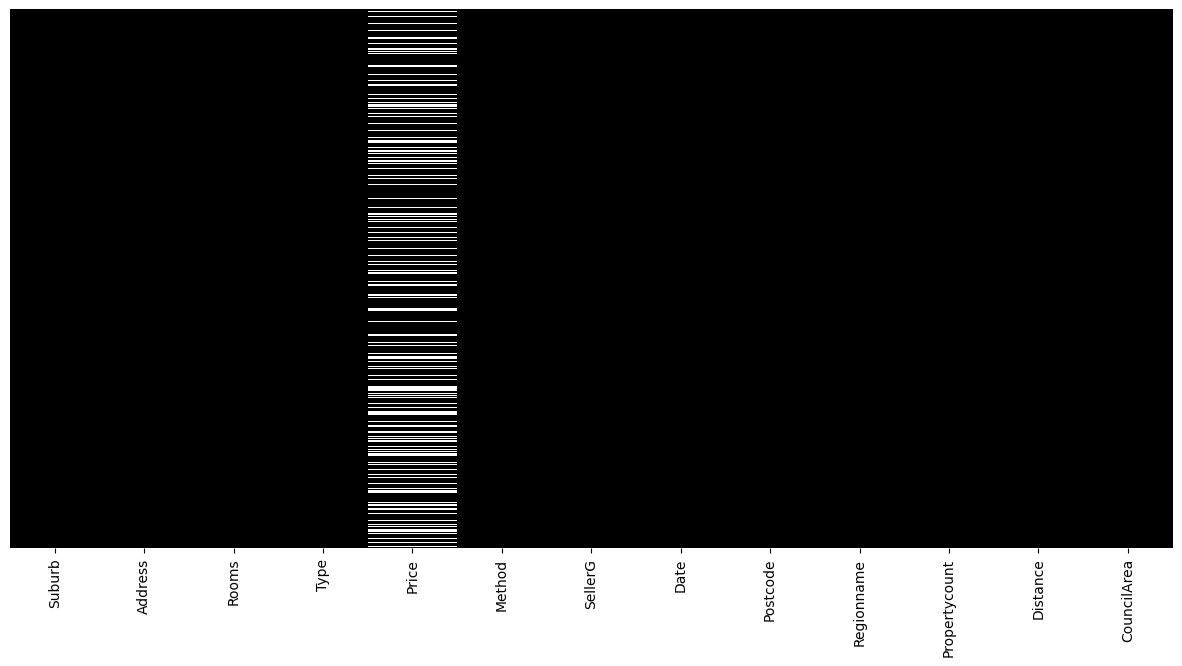

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.set(font_scale=1.2)
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='Greys_r')

plt.show()

In [ ]:
dataset.isnull().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [ ]:
# Percentage of missing valuse
dataset.isnull().sum()/len(dataset)*100


Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            23.150278
Method            0.000000
SellerG           0.000000
Date              0.000000
Postcode          0.000000
Regionname        0.000000
Propertycount     0.000000
Distance          0.000000
CouncilArea       0.000000
dtype: float64

In [ ]:
dataset = dataset.dropna()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         48433 non-null  category      
 1   Address        48433 non-null  category      
 2   Rooms          48433 non-null  int64         
 3   Type           48433 non-null  category      
 4   Price          48433 non-null  float64       
 5   Method         48433 non-null  category      
 6   SellerG        48433 non-null  category      
 7   Date           48433 non-null  datetime64[ns]
 8   Postcode       48433 non-null  category      
 9   Regionname     48433 non-null  category      
 10  Propertycount  48433 non-null  int64         
 11  Distance       48433 non-null  float64       
 12  CouncilArea    48433 non-null  category      
dtypes: category(8), datetime64[ns](1), float64(2), int64(2)
memory usage: 5.4 MB


In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,48433.0,3.071666,0.944708,1.0,2.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Propertycount,48433.0,7566.399913,4457.405884,39.0,4280.0,6567.0,10412.0,21650.0
Distance,48433.0,12.702761,7.550030,0.0,7.0,11.7,16.7,55.8


<ipython-input-17-119698c99cc5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Price'], kde=False, hist_kws=dict(edgecolor="k"))


<Axes: xlabel='Price'>

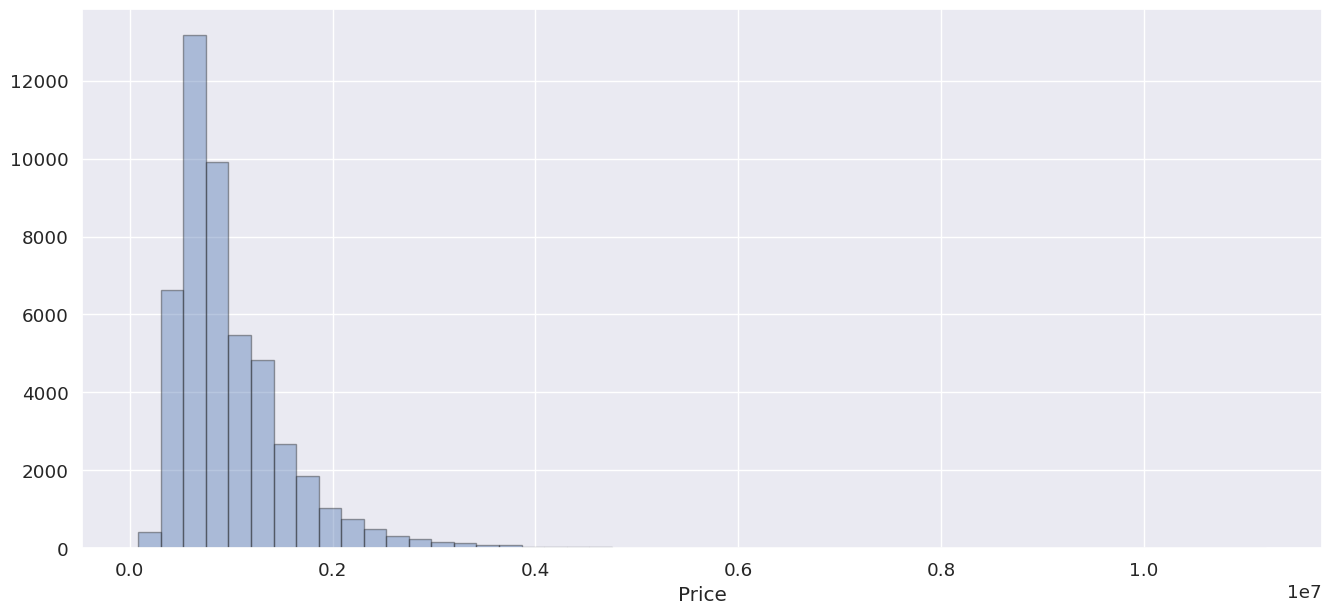

In [ ]:
# Exploratory Analysis

plt.figure(figsize=(16, 7))
sns.distplot(dataset['Price'], kde=False, hist_kws=dict(edgecolor="k"))

In [ ]:
dataset.select_dtypes(['category']).columns


Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'Regionname', 'CouncilArea'],
      dtype='object')

In [ ]:
# Abreivating them

dataset['Regionname'] = dataset['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro',
                                            'Southern Metropolitan':'S Metro',
                                            'Eastern Metropolitan':'E Metro',
                                            'South-Eastern Metropolitan':'SE Metro',
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})


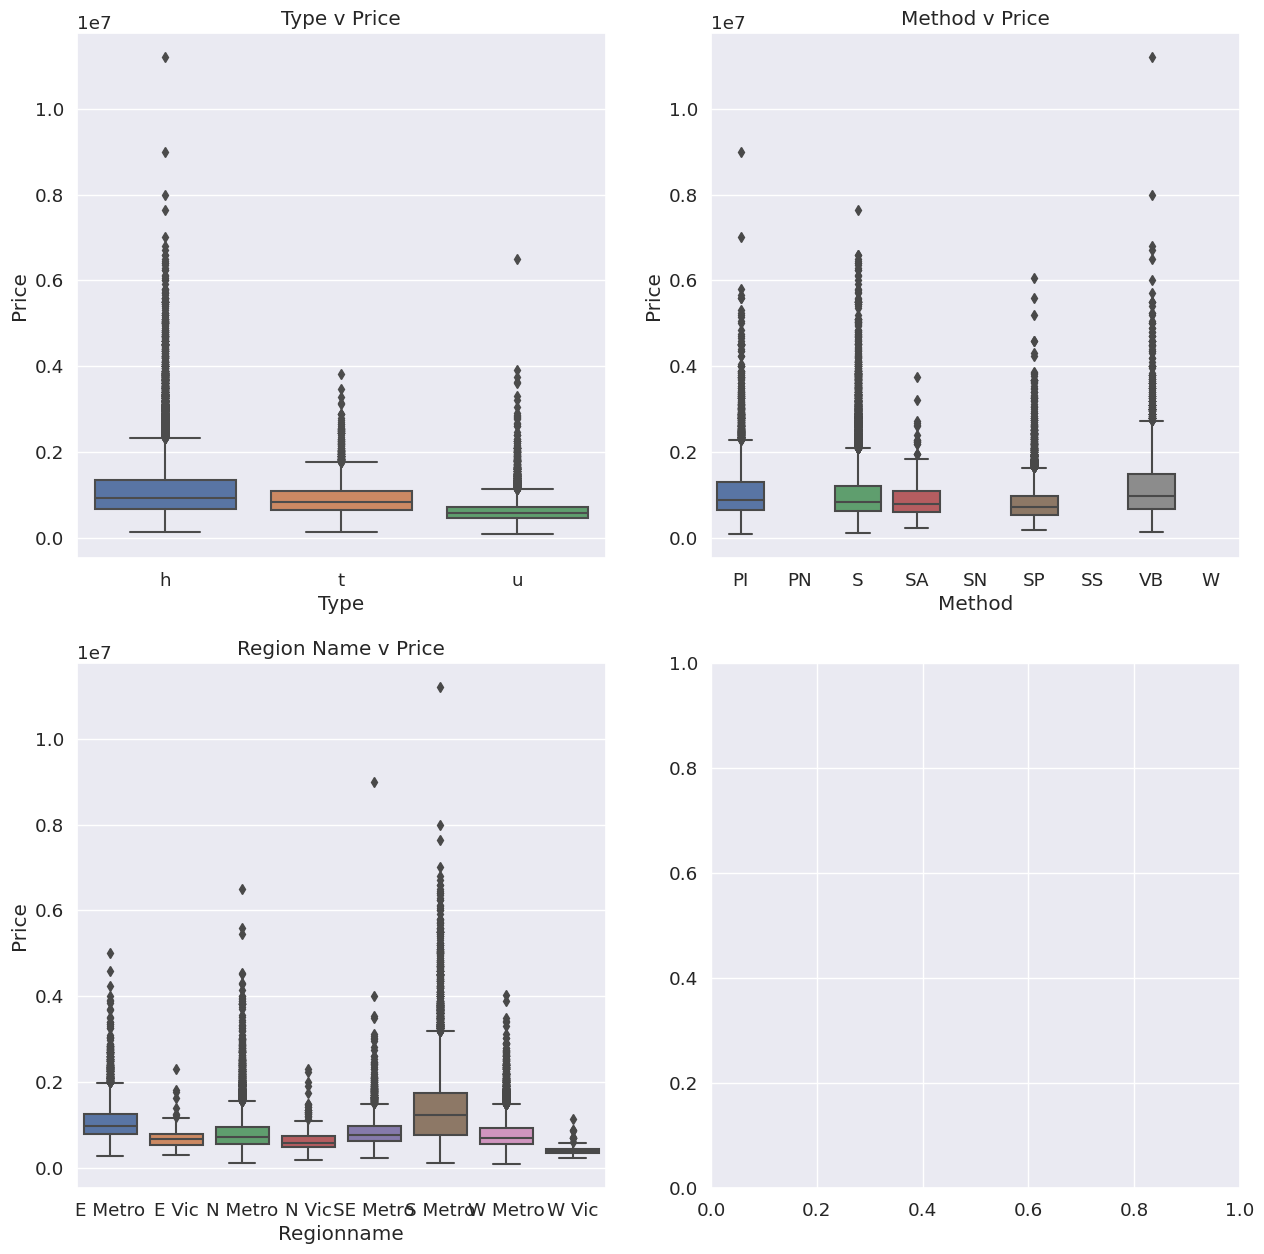

In [ ]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = dataset, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = dataset, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = dataset, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')


plt.show()



<h1>Observations</h1>



*   Median prices for houses are over 1 mil dollar, townhouses are 800k - 900k dollar and units are approx 500k dollar.
*   Home prices with different selling methods are relatively the same across the board.

*   Median prices in the Metropolitan Region are higher than than that of Victoria Region - with Southern Metro being the area with the highest median home price (~$1.3M)..





<h1>Visualise numeric relations</h1>

In [ ]:
dataset.select_dtypes(['float64', 'int64']).columns


Index(['Rooms', 'Price', 'Propertycount', 'Distance'], dtype='object')

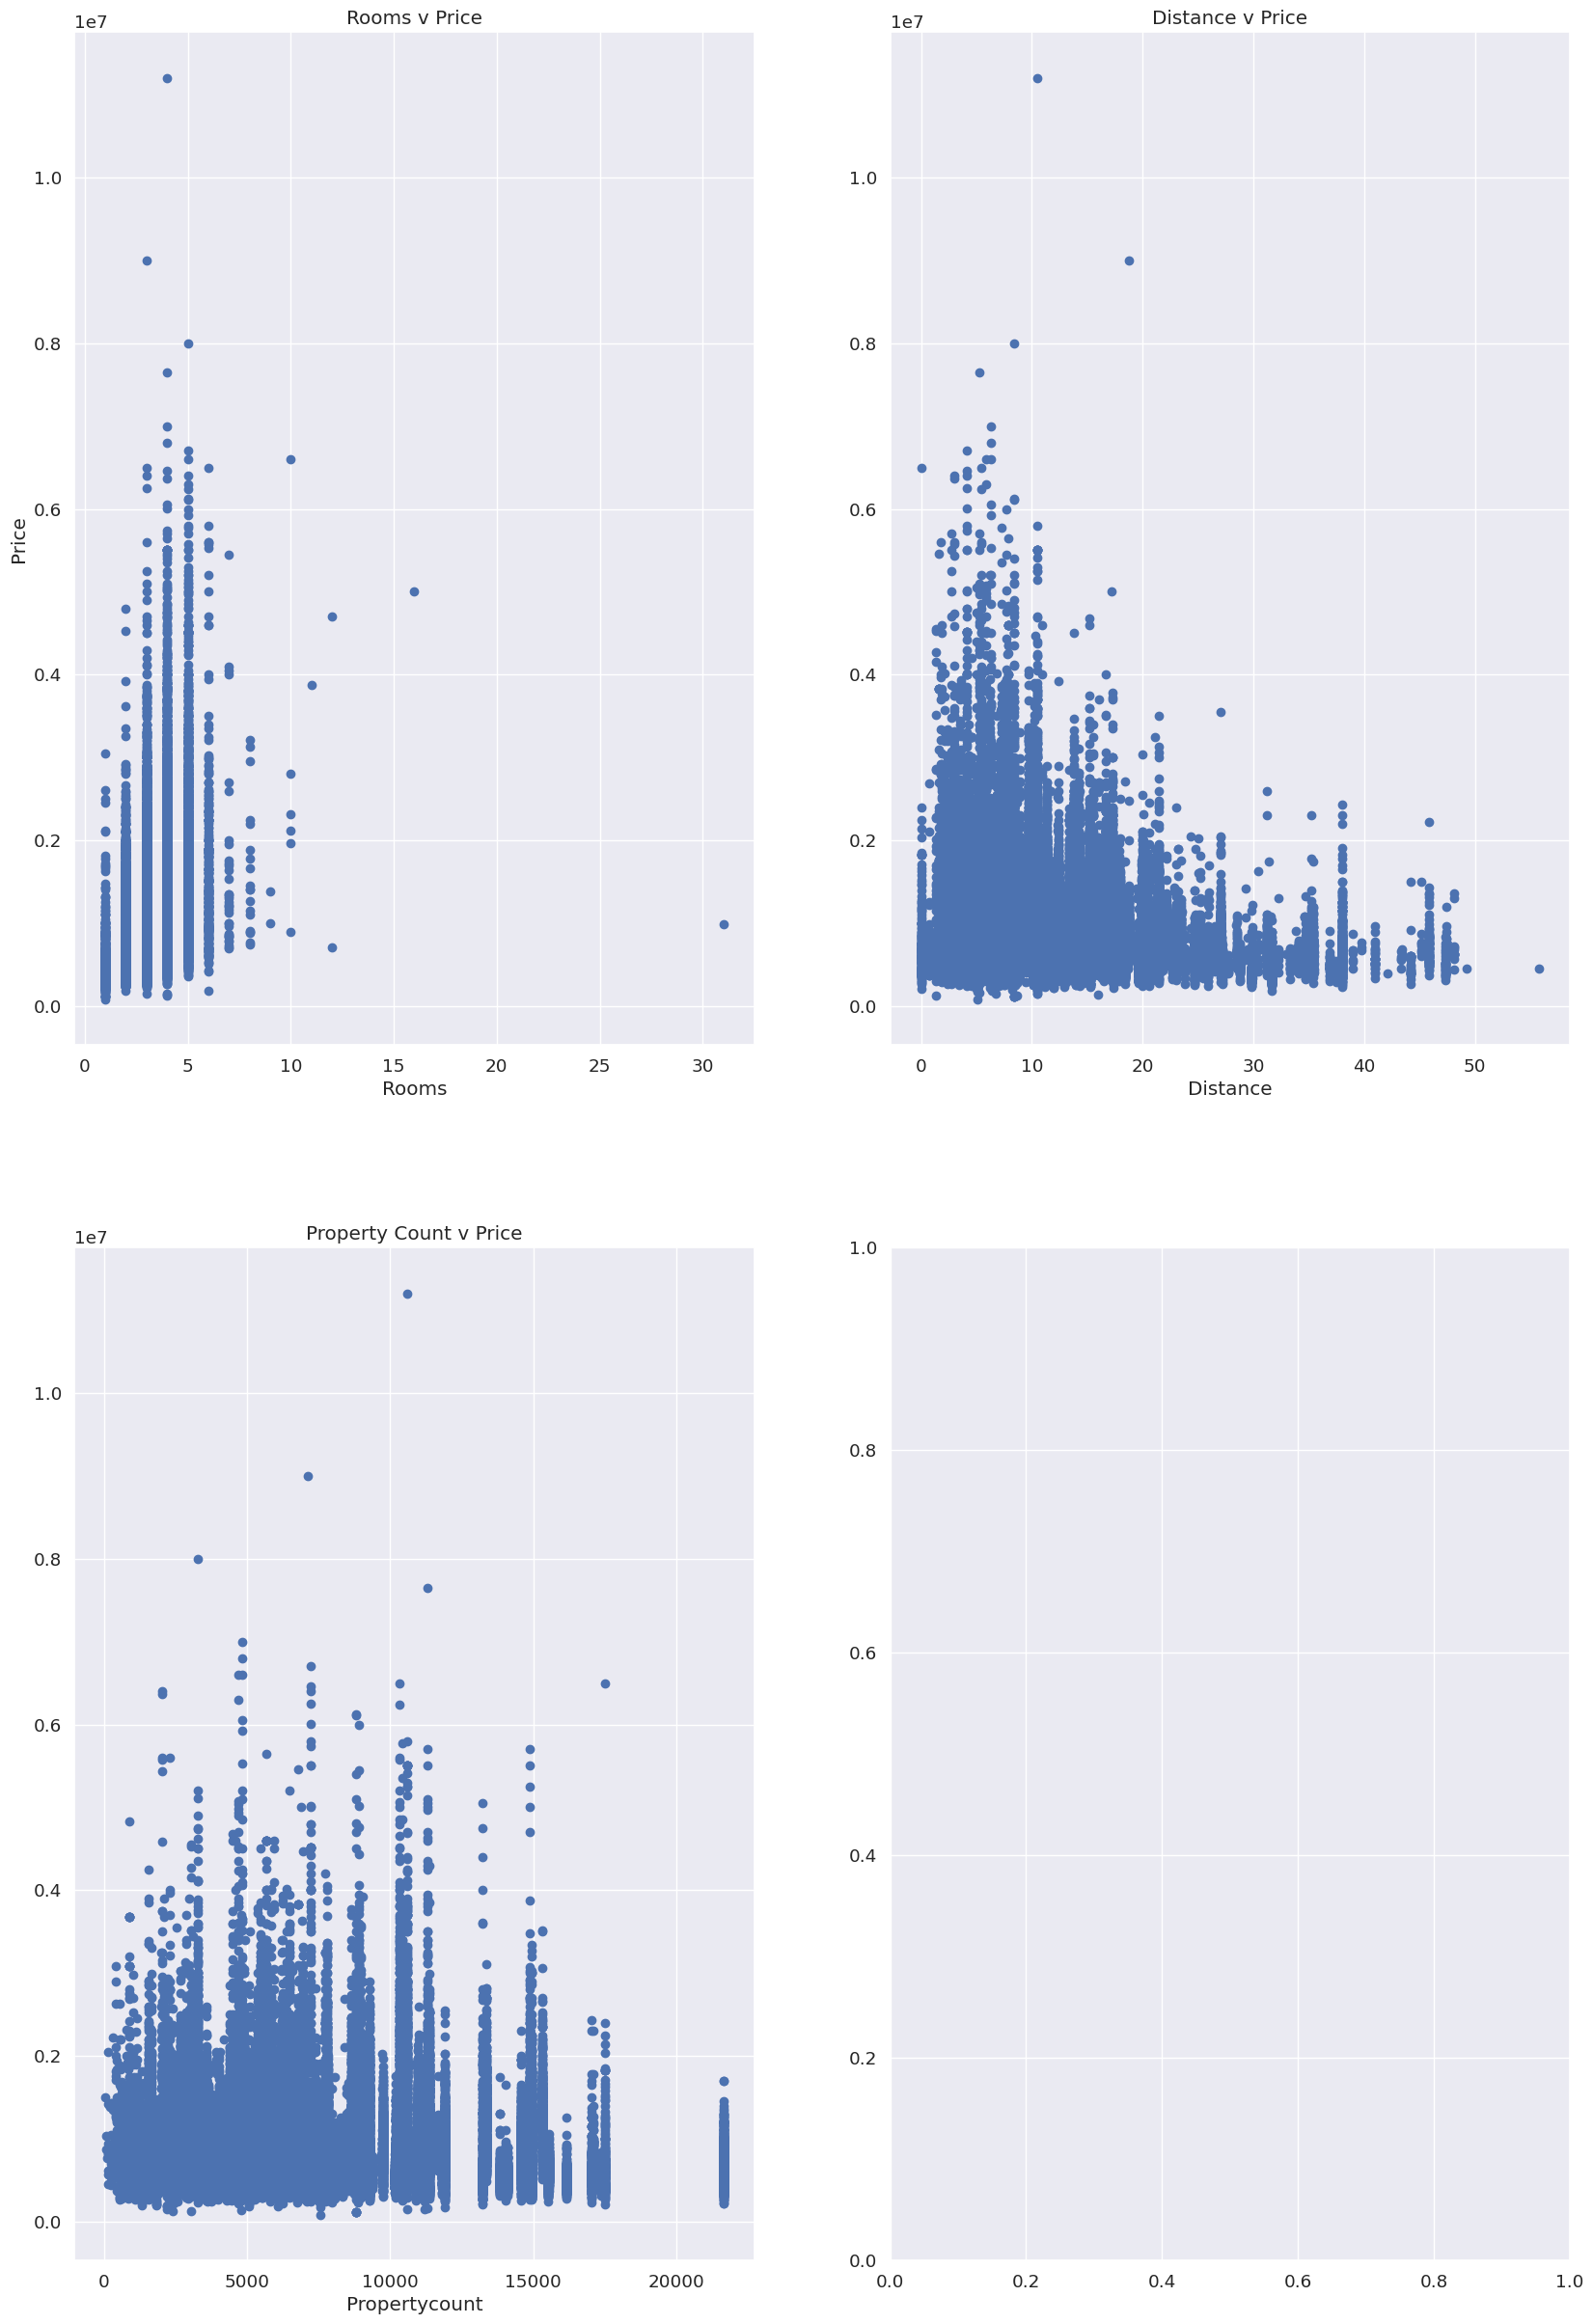

In [ ]:

# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')


# Plot [1,0]
axes[1,0].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Propertycount')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Property Count v Price')

plt.show()



<h1>Observation</h1>



The most prominent trend is that there is a negative correlation between Distance from Melbourne's Central Business District (CBD) and Price.

Most of the houses in the dataset seem to have a maximum of 5 rooms.



The most expensive homes ($2M or more) tend to be within 20km of the CBD.

<h1>Variable Corelation</h1>

<ipython-input-30-5f3a9d964ab8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})


Text(0.5, 1.0, 'Variable Correlation')

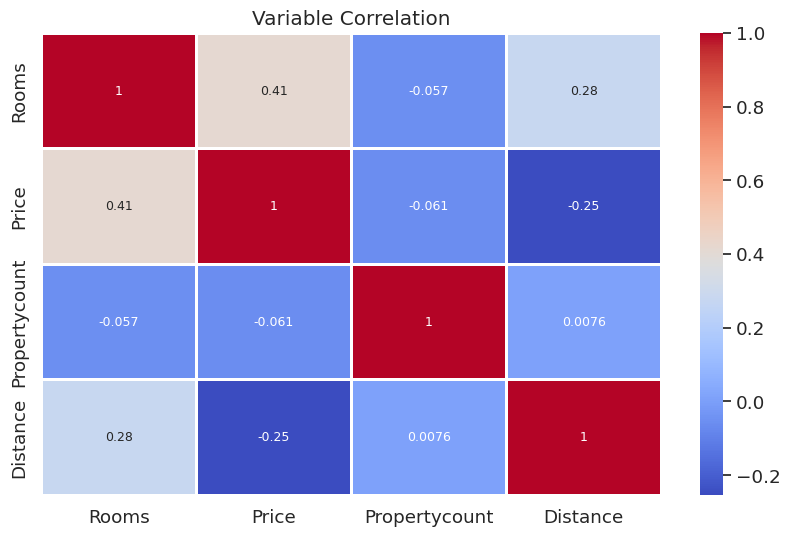

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')


In [ ]:
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Propertycount', 'Distance'], dtype='object')

In [ ]:
# Split
# Create features variable
X = dataset[['Rooms', 'Distance', 'Propertycount']]

# Create target variable
y = dataset['Price']
# X.isna().sum()

In [ ]:
X.head()

,Rooms,Distance,Propertycount
0,3,3.0,4019
1,3,3.0,4019
2,3,3.0,4019
3,3,7.5,1543
4,2,10.4,3464


In [ ]:
df_2 = pd.read_csv("Melbourne_housing_FULL.csv")
df_2 = df_2[['Rooms', 'Distance', 'Propertycount', 'Price']]



df_2 = df_2.dropna()

X_test = df_2[['Rooms', 'Distance', 'Propertycount']]

print(len(X_test))

y_test = df_2['Price']


27244


In [ ]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X,y)



LinearRegression()

In [ ]:

y_pred = regressor.predict(X_test)


In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE: 345739.73088825645
MSE: 273160223432.20526
RMSE: 522647.3222281018


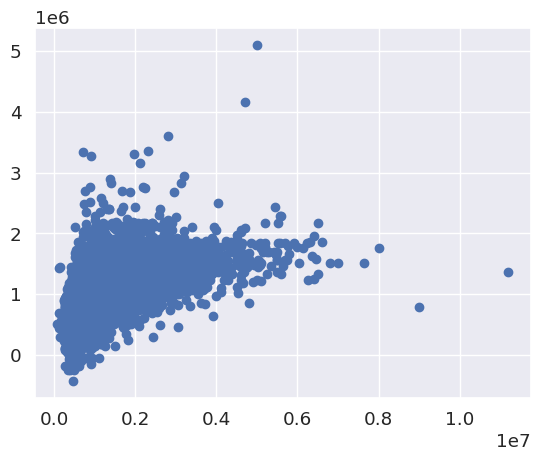

In [ ]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)


<ipython-input-57-d3a81c88d9bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred))


<Axes: xlabel='Price', ylabel='Density'>

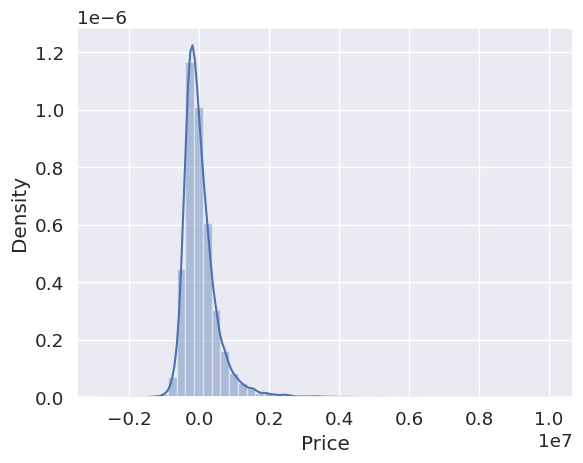

In [ ]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))



In [ ]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf


,Coefficients
Rooms,327945.199107
Distance,-31358.774597
Propertycount,-3.697860
